In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import scipy.stats
import pathos.multiprocessing
import math
import matplotlib.colors as colors

from astropy.io import fits
h = 0.688

I don't think you can find an optimal (M*, zmax), but only the right zmax for given M*. For a given M* cut that you want (e.g. to match Reddick), my suggestion is to plot M_r for all the galaxies that satisfy that cut, and see what threshold in M_r would be required to keep the vast majority of them. That threshold then corresponds to some zmax according to the Zehavi table, which is the one you use to make the correlation function.

In [2]:
# Load the galaxy catalog and remove NaNs
survey = fits.open('../BAM/Old/nsa_v1.fits')[1].data
mass_survey = survey['SERSIC_MASS']/h**2
RA_survey = survey['RA']
DEC_survey = survey['DEC']
Z_survey = survey['ZDIST']
MAG_survey = survey['SERSIC_ABSMAG']
MAG_r = MAG_survey[:, 4]

def remove_nans(mass, mag):
    if not math.isfinite(mass) or not math.isfinite(mag):
        return False
    elif mass <= 0.0:
        return False
    else:
        return True

IDS = list()
for ms, mg, i in zip(mass_survey, MAG_r, np.arange(MAG_r.size)):
    if remove_nans(ms, mg):
        IDS.append(i)

log_mass = np.log10(mass_survey[IDS])
mass = mass_survey[IDS]
Z = Z_survey[IDS]
Mag = MAG_r[IDS]

In [3]:
def proportion_cut(array, cut, size):
    IDS = np.where(array < cut)[0]
    return IDS.size/size

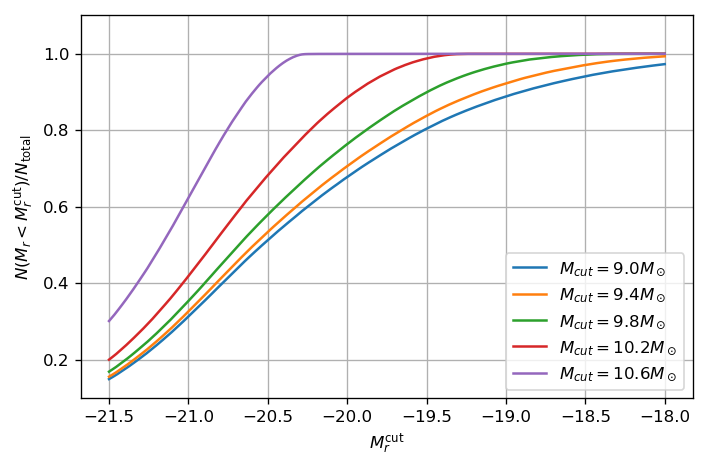

In [29]:
a = -21.5
b = -18
x = np.linspace(a, b, 1000)

mass_cuts = [9.0, 9.4, 9.8, 10.2, 10.6]

plt.figure(dpi=120)
for cut in mass_cuts:
    IDS = np.where(log_mass > cut)
    cmag = Mag[IDS]
    N = cmag.size
    y = np.array([proportion_cut(cmag, i, N) for i in x])
    plt.plot(x,y, label=r"$M_{cut}=%.1f M_\odot$"%cut)
plt.ylim(0.1, 1.1)
# plt.axhline(y=0.5, c='black', linestyle='--', alpha=0.5)
plt.grid()
plt.xlabel(r"$M_r^{\mathrm{cut}}}$")
plt.ylabel(r"$N(M_r<M_r^{\mathrm{cut}})/N_{\mathrm{total}}$")
plt.legend()
plt.tight_layout()
plt.savefig("../Plots/mass_cuts.pdf")
plt.show()